In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
question = pd.read_csv('input/kaggle-survey-2019/survey_schema.csv')
question

,2019 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q31,Q32,Q33,Q34,Q4,Q5,Q6,Q7,Q8,Q9
0,Question:,What is your age (# years)?,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,How long have you been writing code to analyze...,Which of the following integrated development ...,Which of the following hosted notebook product...,...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...
1,# of Respondents:,19717,12497,12250,16781,16569,15690,15627,14627,14443,...,7078,7050,7015,6994,19323,19107,14002,13623,13227,9226
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selected,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,If Select the title most similar to your curre...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
5,If How long have you been writing code to anal...,0,0,0,0,0,0,0,1,1,...,1,1,1,1,0,0,0,0,0,0
6,If Approximately how much money have you spent...,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
7,If Which of the following ML algorithms do you...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,If Which of the following ML algorithms do you...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,If Does your current employer incorporate mach...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
mcq = pd.read_csv('input/kaggle-survey-2019/multiple_choice_responses.csv')
mcq.head(10)

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
6,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1
7,529,22-24,Male,-1,India,Master’s degree,Data Scientist,-1,50-249 employees,20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
8,624,22-24,Female,-1,United States of America,Bachelor’s degree,Data Scientist,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
9,214,22-24,Male,-1,United States of America,Bachelor’s degree,Student,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


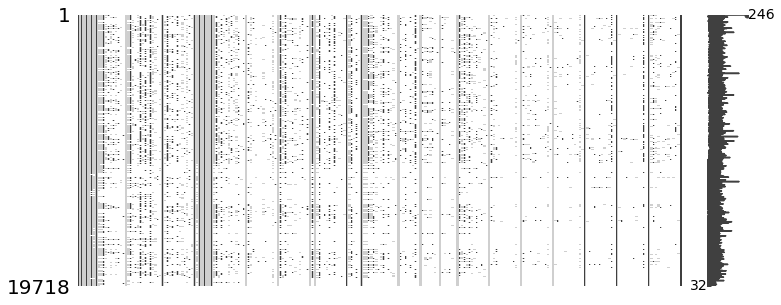

In [10]:
import missingno as msno
msno.matrix(mcq, figsize=(12, 5))

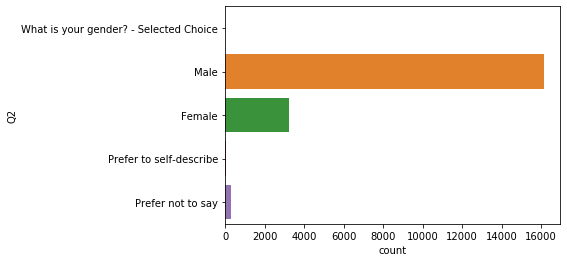

In [11]:
sns.countplot(y='Q2', data=mcq)

In [27]:
con_df = pd.DataFrame(mcq['Q3'].value_counts())
con_df['국가'] = con_df.index
con_df.columns = ['응답 수', '국가']
con_df = con_df.reset_index().drop('index', axis=1)
con_df

,응답 수,국가
0,4786,India
1,3085,United States of America
2,1054,Other
3,728,Brazil
4,673,Japan
5,626,Russia
6,574,China
7,531,Germany
8,482,United Kingdom of Great Britain and Northern I...
9,450,Canada


In [28]:
mcq['Q1'].describe()

count     19718
unique       12
top       25-29
freq       4458
Name: Q1, dtype: object

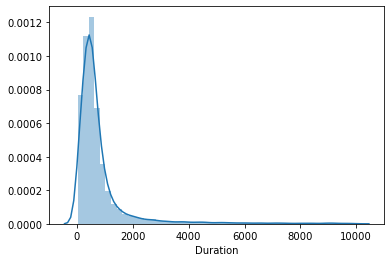

In [63]:
age = pd.DataFrame(mcq['Time from Start to Finish (seconds)'])
age = age.rename(columns={'Time from Start to Finish (seconds)': 'Duration'}).drop([0]).astype('int64')
sns.distplot(age[age['Duration'] < 10000]['Duration'])

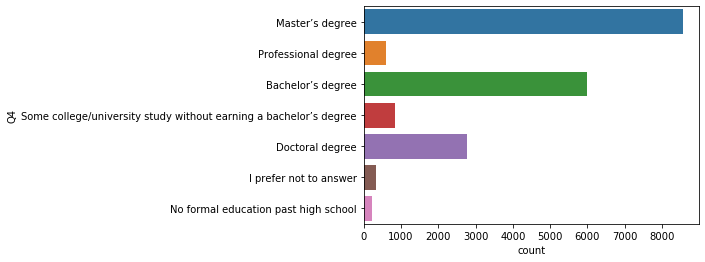

In [65]:
sns.countplot(y='Q4', data=mcq.drop([0]))

In [79]:
major = mcq.drop([0]).Q5
mcq_major_count = pd.DataFrame(major.value_counts())
mcq_major_percent = pd.DataFrame(major.value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Data Scientist,4085,0.213796
Student,4014,0.210080
Software Engineer,2705,0.141571
Other,1690,0.088449
Data Analyst,1598,0.083634
Research Scientist,1470,0.076935
Not employed,942,0.049301
Business Analyst,778,0.040718
Product/Project Manager,723,0.037840
Data Engineer,624,0.032658


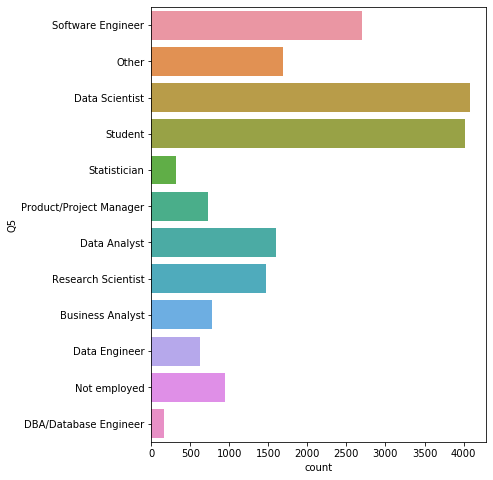

In [80]:
plt.figure(figsize=(6,8))
sns.countplot(y='Q5', data=mcq.drop([0]))

In [81]:
employee = mcq.drop([0])['Q6']
mcq_es_count = pd.DataFrame(employee.value_counts())
mcq_es_percent = pd.DataFrame(employee.value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
0-49 employees,4025,0.287459
"> 10,000 employees",3160,0.225682
"1000-9,999 employees",2641,0.188616
50-249 employees,2329,0.166333
250-999 employees,1847,0.131910


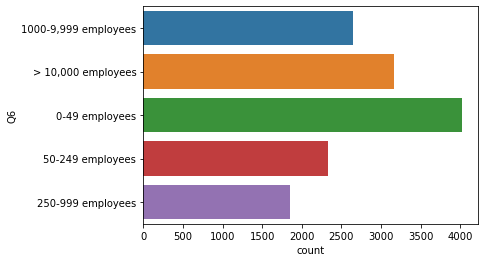

In [82]:
sns.countplot(y='Q6', data=mcq.drop([0]))

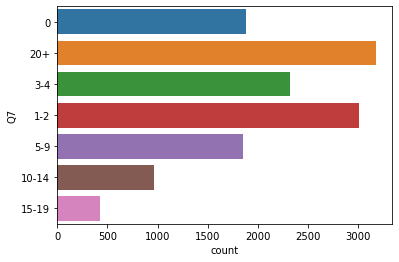

In [83]:
sns.countplot(y='Q7', data=mcq.drop([0]))

The number of interviewees in Korea: 194


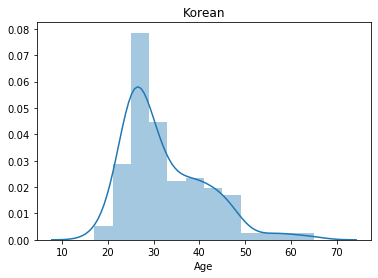

In [116]:
mcq2 = pd.read_csv('input/kaggle-survey-2017/multipleChoiceResponses.csv',
                  encoding="ISO-8859-1", low_memory=False)
korea = mcq2.loc[(mcq2['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [117]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

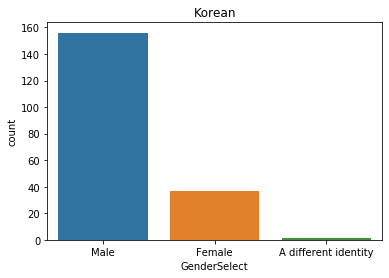

In [118]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

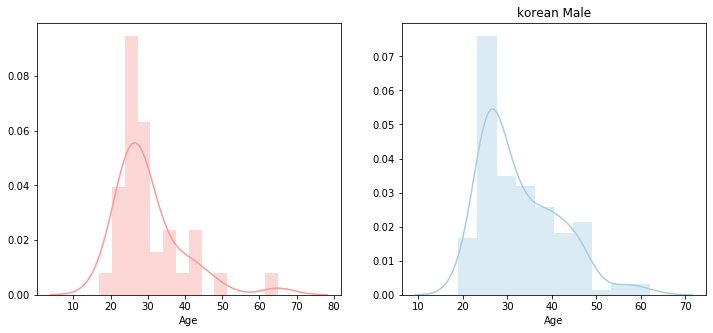

In [119]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12, 5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')